In [4]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()

def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()
    blk.add(nn.Conv2D(num_channels, kernel_size, strides, padding, activation='relu'),
           nn.Conv2D(num_channels, kernel_size=1, activation='relu'),
           nn.Conv2D(num_channels, kernel_size=1, activation='relu'))
    return blk
    

In [8]:
def nin_model():
    net = nn.Sequential()
    net.add(nin_block(num_channels=96, kernel_size=11, strides=4, padding=0),
           nn.MaxPool2D(pool_size=3, strides=2),
           nin_block(num_channels=256, kernel_size=5, strides=1, padding=2),
           nn.MaxPool2D(pool_size=3, strides=2),
           nin_block(num_channels=384, kernel_size=3, strides=1, padding=1),
           nn.MaxPool2D(pool_size=3, strides=2),
           nn.Dropout(0.5),
           nin_block(num_channels=10, kernel_size=3, strides=1, padding=1),
           nn.GlobalAvgPool2D(), ## The global average pooling layer automatically sets the window shape to the 
                                ## height and width of the input
           nn.Flatten())  ## Transform the four-dimensional output into two-dimensional output with 
                          ## a shape of (batch_size, 10)
    return net

In [9]:
net = nin_model()
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential1 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
sequential2 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
sequential3 output shape:	 (1, 384, 12, 12)
pool2 output shape:	 (1, 384, 5, 5)
dropout0 output shape:	 (1, 384, 5, 5)
sequential4 output shape:	 (1, 10, 5, 5)
pool3 output shape:	 (1, 10, 1, 1)
flatten0 output shape:	 (1, 10)


KeyboardInterrupt: 

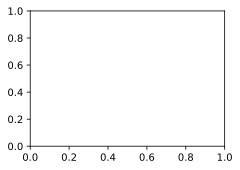

In [10]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)